
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer
Our example problem comes from the realm of science just not data science. The problem came from Ryan’s undergraduate lab days working on a team to synthesize nanoparticles. After synthesis, the particles were characterized and then given a grade based on the overall homogeneity of their size/shape and purity. One day a perfect batch was synthesized, and Ryan means perfect, the particles looked like a textbook example and were heavily documented for upcoming research publications. But there was a problem, Ryan had cooked them with another student and they had mutually agreed, since it was late and the nth batch they cooked that day, they didn’t really need to write anything down… Typically everything is written down for every synthesis, all weights, all temperature fluctuations, even the smallest variances could drastically change the particles. So, they trophy batch of particles was effectively not reproducible. There was a major effort in the lab to quantify all the missing data, such as a futile effort to find the missing weights, by aggregating every sample weight ever that had been taken from the specific vessels. In the end they gave up, having effectively held the golden ticket to perfect particles but in the end the results couldn’t be used due to lack of documentation and Ryan washed dishware for a couple weeks. 



# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


## Answer

<img src="https://i.imgur.com/FqSnxrA.png">

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.


## Answer

This is when variables in the feature set are correlated with each other. This is a problem because the beta coefficients generated for the OLS solution of MLR are going to be biased, causing the standard errors to be inflated. Beta coefficients for correlated variables will both account for the variance that the other variable is responsible for explaining in the model. One way to diagnose this issue is by creating pairwise scatterplots for the feature matrix and looking for plots that show straight-line trends. Principle components analysis can be used to address this problem by compressing the correlated variables into new variables that are uncorrelated linear combinations of correlated features.

# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please donwload the dataset "reduced_train.csv" and use it.



In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

## Answer



a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows

In [6]:
X.shape

(188318, 14)

In [7]:
X[:5]

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [8]:
#Creating the Model
lgr = linear_model.LinearRegression()
#Fit the Model
model = lgr.fit(X,Y)
#Prient coefficients
pd.DataFrame(model.coef_)

,0
0,-2137.111212
1,1762.240616
2,-56.579685
3,-301.172981
4,30.032018
5,-557.225099
6,1707.955206
7,298.612406
8,2049.379104
9,-250.019861


In [9]:
# Making a Prediction
pred = model.predict(X)
MAE = mean_absolute_error(Y,pred)
print("The model's MAE is: " + str(MAE))

The model's MAE is: 1950.3606265639835


c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained.

In [11]:
#Create the training Model
lgr_train = linear_model.LinearRegression()
#Fit the training Model
model_train = lgr_train.fit(X_train, Y_train)
#Predict using the train set
pred_train = model_train.predict(X_train)
pred_train_MAE = mean_absolute_error(Y_train,pred_train)
print("The Train MAE is: " + str(pred_train_MAE))
#Predict using the test set
pred_test = model_train.predict(X_test)
pred_test_MAE = mean_absolute_error(Y_test, pred_test)
print("The Test MAE is: " + str(pred_test_MAE))

The Train MAE is: 1946.9866773014621
The Test MAE is: 1954.111059596165


From the results, we have a higher MAE from the predicttion using the TEst data. However it is worth noting that the numbers are similar, indicating the accuracy of both models in very comparable. 

d. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

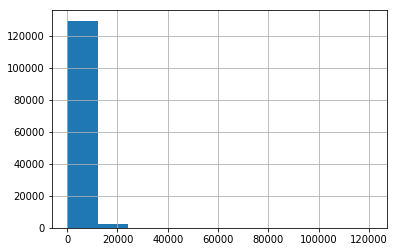

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot a histogram of Y_train
Y_train.hist()

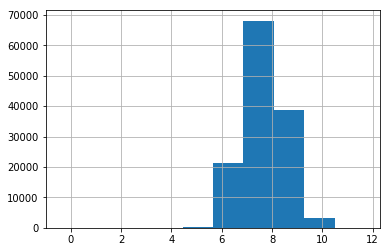

In [51]:
#Plot a histogram of log(Y_train)
Y_train_log = np.log(Y_train)
Y_train_log.hist()

In [53]:
#Create the training Model
Y_test_log = np.log(Y_test)
lgr_train2 = linear_model.LinearRegression()
#Fit the training Model
model_train2 = lgr_train2.fit(X_train, Y_train_log)
#Predicting off Test
pred_train2 = model_train2.predict(X_train)
#Scaling back units
pred_train2_scale = np.exp(pred_train2)

model_train2_MAE = mean_absolute_error(Y_train, pred_train2_scale)
print("The scaled Train MAE is: "+str(model_train2_MAE))

# Create/Fit the testing Model
pred_test2 = model_train2.predict(X_test)
pred_test2_scale = np.exp(pred_test2)

model_test2_MAE = mean_absolute_error(Y_test, pred_test2_scale)
print("The scaled Test MAE is: "+str(model_test2_MAE))

The scaled Train MAE is: 1797.4369165421042
The scaled Test MAE is: 1810.6519682594767


When fitting the model with the log of Y_train, the MAE of the model is reduced in both the training and testing sets. This is because the linear model assumes that the target is normally distributed, when in reality, it is not. However, when we take the log of Y_train, we transform the distribution of Y_train so that it is normal and this assumption of OLS becomes true, allowing the model to make more accurate predictions.

# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

## Answer

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)


In [54]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore") # The only warnings are convergence warnings

In [55]:
lasso = Lasso(random_state=50)
alphas =  10**np.linspace(10,-6,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5
lasso_model = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring = 'neg_mean_absolute_error')
lasso_model.fit(X_train, Y_train_log)
scores = lasso_model.cv_results_['mean_test_score']
scores_std = lasso_model.cv_results_['std_test_score']

(5000000000.0, 5e-07)

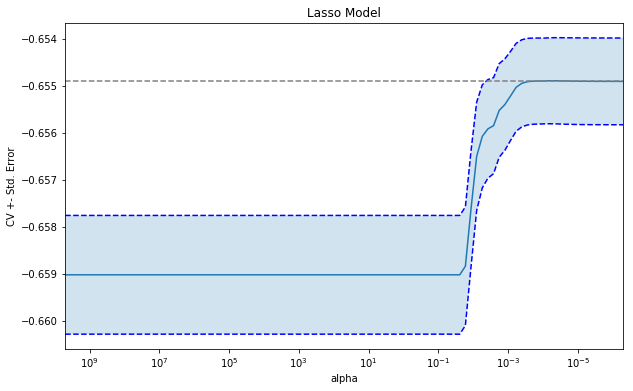

In [56]:
# Plotting results
plt.figure().set_size_inches(10, 6)
plt.semilogx(alphas, scores)
std_error = (scores_std / np.sqrt(n_folds))

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.title('Lasso Model')
plt.ylabel('CV +- Std. Error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [57]:
print ("The best lambda from the Lasso Model: {}".format(lasso_model.best_params_['alpha']))

The best lambda from the Lasso Model: 6.30928441533e-05


In [58]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [59]:
ridge = Ridge(random_state=50)
alphas =  10**np.linspace(10,-6,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

ridge_model = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring = 'neg_mean_absolute_error')
ridge_model.fit(X_train, Y_train_log)
scores = ridge_model.cv_results_['mean_test_score']
scores_std = ridge_model.cv_results_['std_test_score']

(5000000000.0, 5e-07)

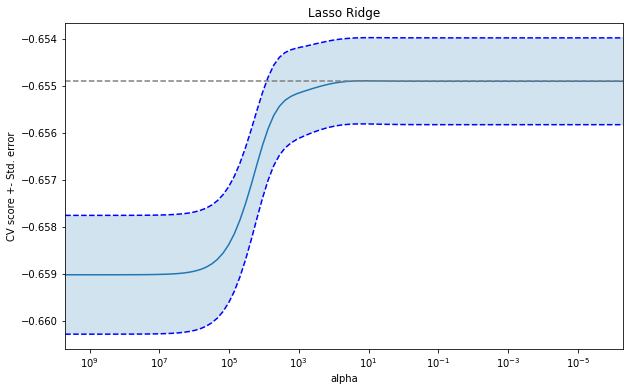

In [60]:
# Plotting results
plt.figure().set_size_inches(10, 6)
plt.semilogx(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.title('Lasso Ridge')
plt.ylabel('CV score +- Std. error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [61]:
print ("The best lambda from the Lasso Model: {}".format(ridge_model.best_params_['alpha']))

The best lambda from the Lasso Model: 13.5929412137


2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

In [62]:
# Create the Lasso Model
coefs_lasso = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, Y_train_log)
    coefs_lasso.append(lasso.coef_)

Text(0.5,1,'Lasso Coefficients Regularized')

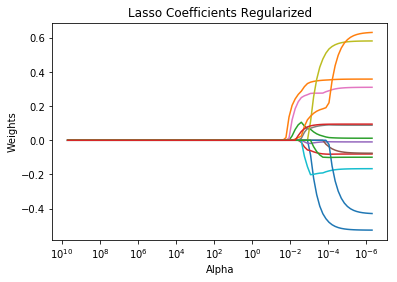

In [63]:
# Plot lasso
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # Reverse axis
ax.set_xlabel('Alpha')
ax.set_ylabel('Weights')
ax.set_title('Lasso Coefficients Regularized')

In [64]:
# Run Ridge
coefs_ridge = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, Y_train_log)
    coefs_ridge.append(ridge.coef_)

Text(0.5,1,'Ridge Coefficients Regularized')

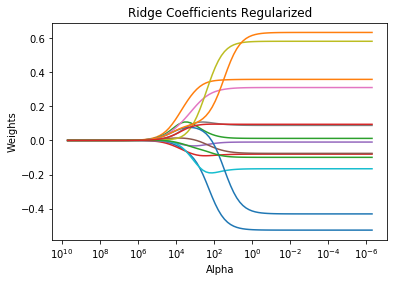

In [65]:
# Plot Ridge
ax = plt.gca()    
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # Reverse axis
ax.set_xlabel('Alpha')
ax.set_ylabel('Weights')
ax.set_title('Ridge Coefficients Regularized')

These graphs show clearly why the regularization phenomena is described as a "penalty factor". When the regularization parameter decreases the weights of each factor increase and vise-versa. While increasing the penalty factor you are decereasding the contribution of other factor weights. In lasso these weights can equal zero and cancel out the factor completely. In ridge, the weights can get close to zero but the factor is still in play.


3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

In [66]:
#Least Squares Regression
lrm_train2 = linear_model.LinearRegression()
model_train2 = lrm_train2.fit(X_train, Y_train_log)
#Predicting off Test
pred_test2 = model_train2.predict(X_test)
#Scaling back units
pred_test2_scale =np.exp(pred_test2)

lrm_test2_MAE = mean_absolute_error(Y_test,pred_test2_scale)
print("Least Squares Regression MAE: "+str(lrm_test2_MAE))

Least Squares Regression MAE: 1810.6519682594767


In [67]:
#Lasso
lasso_alpha = lasso_model.best_params_['alpha']
lasso = linear_model.Lasso(random_state = 50, alpha = lasso_alpha)
lasso_fit = lasso.fit(X_train, Y_train_log)
#Predicting off test
lasso_pred = lasso_fit.predict(X_test)
#Scaling back units
lasso_pred_scale = np.exp(lasso_pred)
lasso_MAE = mean_absolute_error(Y_test, lasso_pred_scale)
print ("Lasso MAE: "+ str(lasso_MAE))

Lasso MAE: 1810.6424216634994


In [68]:
# Ridge
ridge_alpha = ridge_model.best_params_['alpha']
ridge = Ridge(random_state = 50, alpha = ridge_alpha)
ridge_fit = ridge2.fit(X_train, Y_train_log)

# Predicting off test
ridge_pred = ridge_fit.predict(X_test)
#Scaling back units
ridge_pred_scale = np.exp(ridge_pred)

ridge_MAE = mean_absolute_error(Y_test, ridge_pred_scale)
print ("Ridge MAE: " + str(ridge_MAE))

Ridge MAE: 1810.6310418084493


4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

In [69]:
clf = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
clf.fit(X_train, Y_train_log)
lasso_alpha = clf.alpha_
print("The best lambda value is: " + str(lasso_alpha))

The best lambda value is: 1.742378003185893e-05


In [70]:
lasso2 = Lasso(random_state = 50, alpha = lasso_alpha)
lasso2_fit = lasso2.fit(X_train, Y_train_log)
print ("Lasso coefficients: ")
pd.DataFrame(lasso2_fit.coef_)

Lasso coefficients: 


,0
0,-0.517112
1,0.356932
2,0.012615
3,-0.080685
4,-0.009504
5,-0.068813
6,0.306097
7,0.088403
8,0.572165
9,-0.168691


# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer

<img src="https://imgur.com/waykJvP.png">

i.) When there is data-dependent noise, the regression equation will be pulled towards the noise. This has the effect of imposing weight on different data points. For example, data points closer to the noise will have a greater impact on the regression equation, and will effectively have a larger weight when compared to data points further away from the noise, which have a dampened impact on the regression.

ii.) When there are replicated data points, data points will effectively take on weights that correspond to the number of times that they are replicated. For example, if a single data point is repeated twice in the data, it will have twice as much impact on the regression equation when compared to data points that occur only once in the data.